### Importing Libraries

In [2]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)

### Importing Dataset

In [3]:
df1 = pd.read_csv('marks dataset.csv')
df1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [4]:
df1.shape

(1000, 8)

### Deleting the unneccessary columns


In [5]:
df2 = df1.drop(['gender' , 'race/ethnicity' , 'parental level of education' , 'lunch'], axis='columns')
df2.shape


(1000, 4)

In [6]:
df2.head()

,test preparation course,math score,reading score,writing score
0,completed,67,67,63
1,none,40,59,55
2,none,59,60,50
3,none,77,78,68
4,completed,78,73,68


In [7]:
df2.isnull().sum()

test preparation course    0
math score                 0
reading score              0
writing score              0
dtype: int64

In [8]:
df2['test preparation course'].unique()

array(['completed', 'none'], dtype=object)

In [9]:
df2['math score'].unique()

array([ 67,  40,  59,  77,  78,  63,  62,  93,  47,  99,  80,  74,  81,
        69,  58,  54,  23,  39,  83,  71,  44,  46,  51,  53,  33,  87,
        65,  79,  68,  57,  98, 100,  60,  64,  52,  36,  56,  88,  42,
        76,  49,  72,  31,  32,  97,  94,  95,  45,  75,  66,  70,  82,
        92,  30,  41,  43,  55,  73,  48,  86,  84,  50,  89,  91,  85,
        61,  35,  90,  96,  13,  38,  28,  26,  37,  29,  34,  25],
      dtype=int64)

In [10]:
df2['reading score'].unique()

array([ 67,  59,  60,  78,  73,  77,  88,  56,  42,  83,  87,  74,  61,
        47,  62,  44,  32,  76,  52,  69,  55,  38,  45,  68,  89,  54,
        79,  41,  65,  81,  75,  70,  46,  63,  72,  58,  53,  57,  80,
        51,  66,  82,  93,  64,  91,  43,  71, 100,  50,  33,  34,  90,
        84,  95,  98,  92,  85,  49,  86,  48,  94,  36,  28,  39,  29,
        96,  97,  40,  27,  37,  99,  31,  35], dtype=int64)

In [11]:
df2['writing score'].unique()

array([ 63,  55,  50,  68,  76,  84,  65,  45,  85,  90,  73,  57,  42,
        44,  31,  88,  54,  32,  56,  60,  89,  51,  77,  39,  71,  74,
        75,  72,  64,  82,  70,  87,  78,  49,  47,  62,  83,  48,  59,
        97,  81,  67,  69,  61,  93, 100,  53,  79,  58,  33,  86,  66,
        46,  80,  91,  92,  95,  99,  96,  28,  52,  24,  40,  43,  94,
        23,  38,  30,  35,  41,  98,  36,  27,  26,  34,  37], dtype=int64)

### Creating total marks column

In [12]:
df3 = df2.copy()
df3['total marks'] = df3['math score'] + df3['reading score'] + df3['writing score']
df3.head()

,test preparation course,math score,reading score,writing score,total marks
0,completed,67,67,63,197
1,none,40,59,55,154
2,none,59,60,50,169
3,none,77,78,68,223
4,completed,78,73,68,219


### Creating total percentage Column

In [13]:
df3['total percentage'] = df3['total marks']/300*100
df3.head()

,test preparation course,math score,reading score,writing score,total marks,total percentage
0,completed,67,67,63,197,65.666667
1,none,40,59,55,154,51.333333
2,none,59,60,50,169,56.333333
3,none,77,78,68,223,74.333333
4,completed,78,73,68,219,73.000000


### Rounding off the percentage

In [14]:
df3['total percentage'] = round(df3['total percentage'], 2 )

In [15]:
df3.head()

,test preparation course,math score,reading score,writing score,total marks,total percentage
0,completed,67,67,63,197,65.67
1,none,40,59,55,154,51.33
2,none,59,60,50,169,56.33
3,none,77,78,68,223,74.33
4,completed,78,73,68,219,73.00


### Checking for the outliers


- Marks should not less than zero


In [16]:

maths = df3['math score']
len(maths[maths<0])


0

- Marks should not greater than zero



In [17]:
len(maths[maths>100])


0

In [18]:
read = df3['reading score']
len(read[read<0])


0

In [19]:
len(read[read>100])

0

In [20]:
write = df3['writing score']
len(write[write<0])

0

In [21]:
len(write[write>100])

0

In [22]:
df3.describe()

,math score,reading score,writing score,total marks,total percentage
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000,203.136000,67.712000
std,15.402871,14.737272,15.600985,43.542732,14.514123
min,13.000000,27.000000,23.000000,65.000000,21.670000
25%,56.000000,60.000000,58.000000,175.750000,58.585000
50%,66.500000,70.000000,68.000000,202.000000,67.330000
75%,77.000000,79.000000,79.000000,235.000000,78.330000
max,100.000000,100.000000,100.000000,300.000000,100.000000


In [23]:
df3

,test preparation course,math score,reading score,writing score,total marks,total percentage
0,completed,67,67,63,197,65.67
1,none,40,59,55,154,51.33
2,none,59,60,50,169,56.33
3,none,77,78,68,223,74.33
4,completed,78,73,68,219,73.00
...,...,...,...,...,...,...
995,none,73,70,65,208,69.33
996,completed,85,91,92,268,89.33
997,none,32,35,41,108,36.00
998,none,73,74,82,229,76.33


## Model Building and Training


In [27]:
from sklearn.cluster import KMeans

#### Clustering for maths column


In [28]:
kmeans_math = KMeans(n_clusters=3,random_state=0)
df3['math_cluster'] = kmeans_math.fit_predict(df3[['math score']])

C:\Users\varun\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Plotting graph on Math cluster

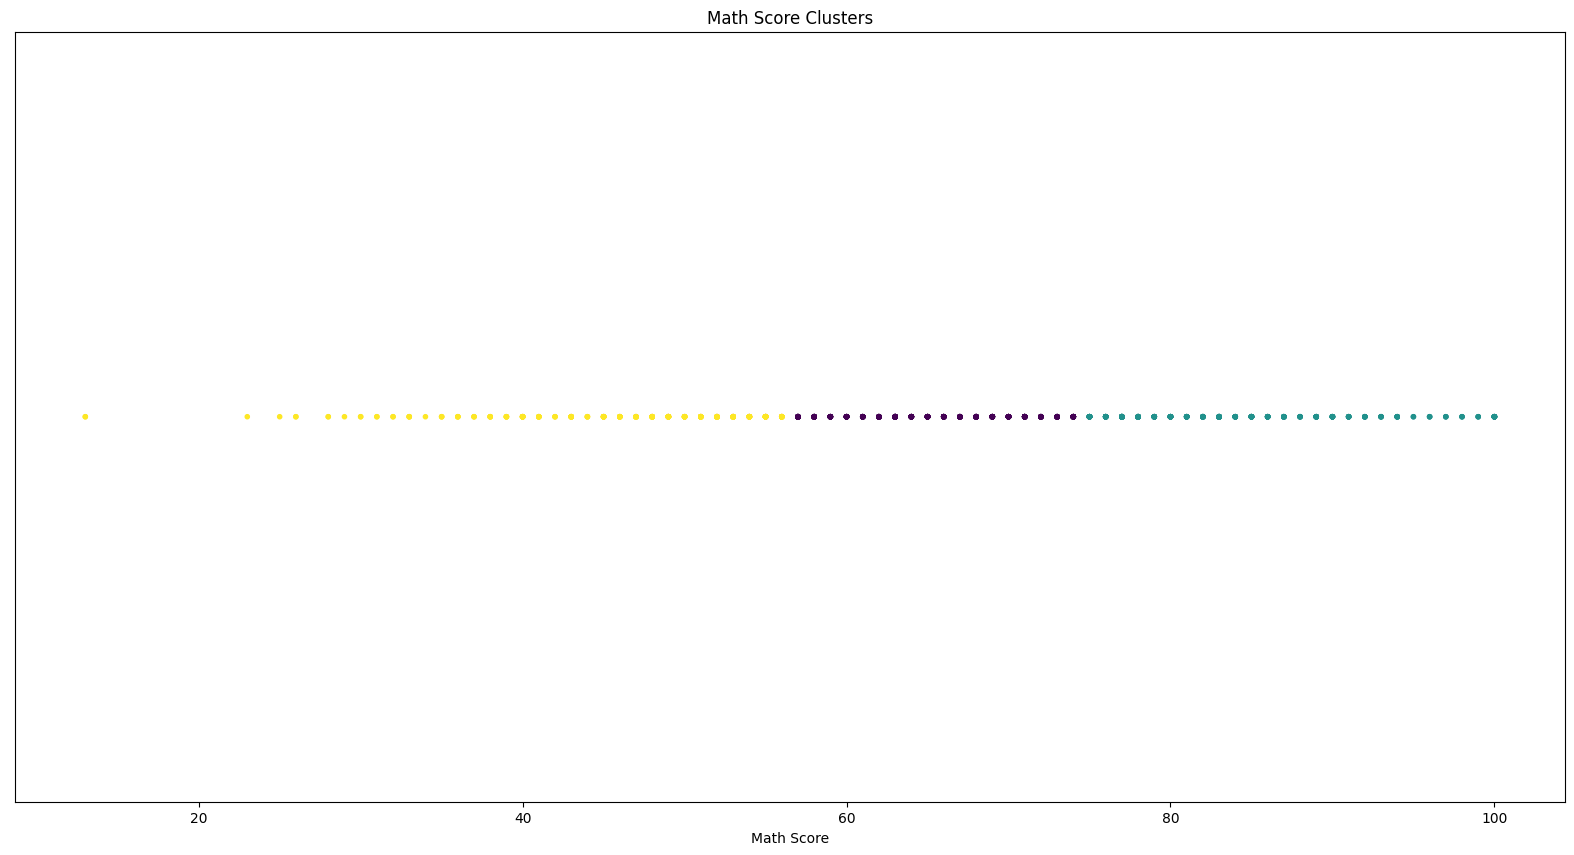

In [30]:
plt.scatter(df3['math score'], [0] * len(df3), c=df3['math_cluster'], cmap='viridis', marker='.')
plt.xlabel('Math Score')
plt.title('Math Score Clusters')
plt.yticks([])
plt.show()

#### Clustering for Reading column


In [31]:
kmeans_reading = KMeans(n_clusters=3,random_state=0)
df3['reading_cluster'] = kmeans_reading.fit_predict(df3[['reading score']])

C:\Users\varun\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Plotting graph on Reading cluster

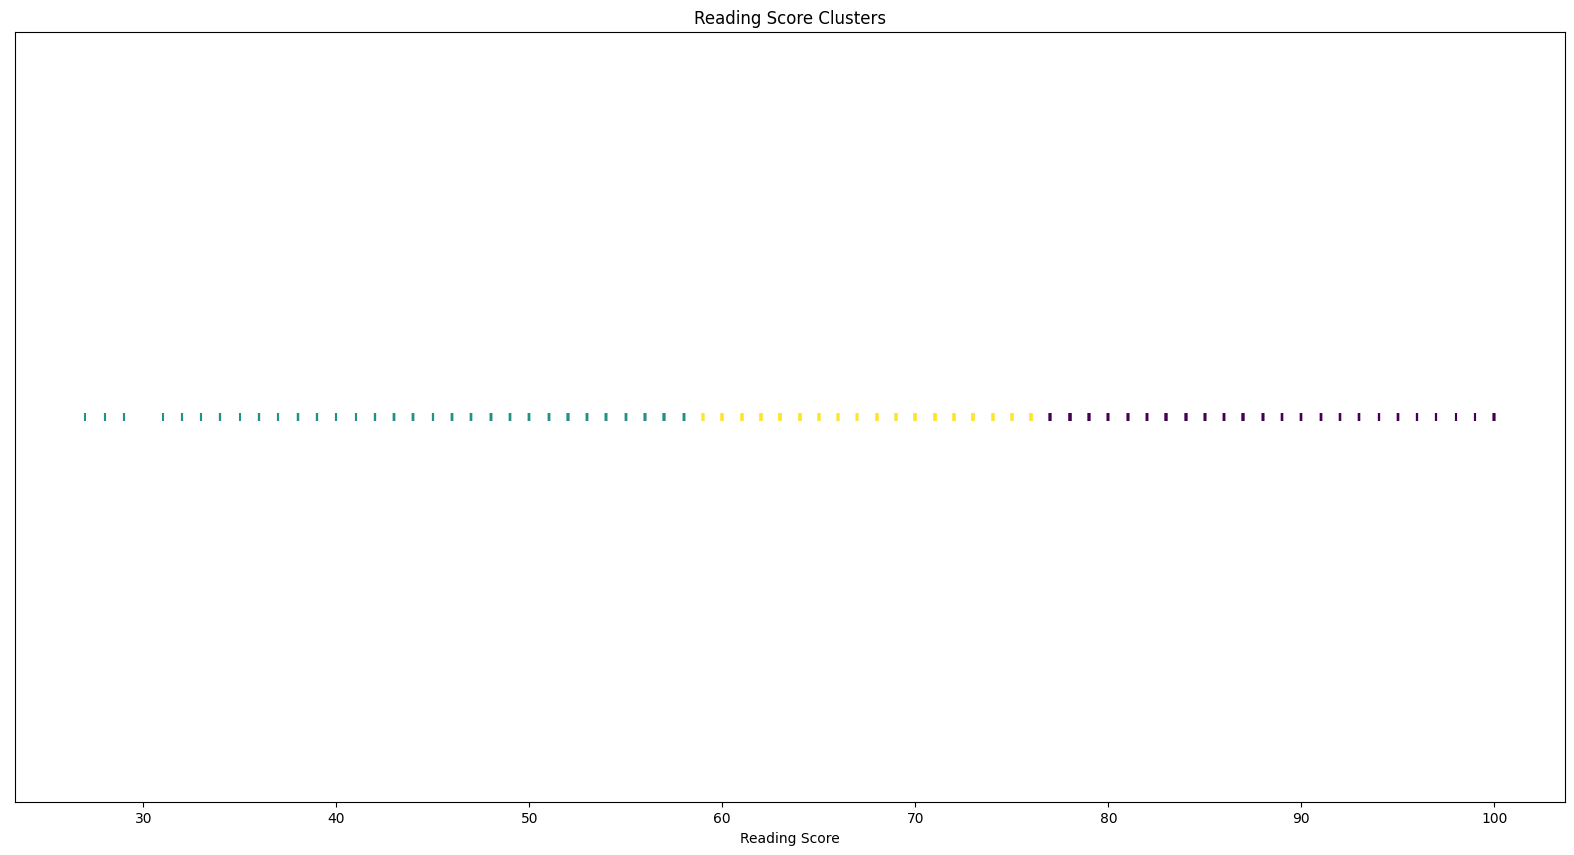

In [32]:
plt.scatter(df3['reading score'], [0] * len(df3), c=df3['reading_cluster'], cmap='viridis', marker='|')
plt.xlabel('Reading Score')
plt.title('Reading Score Clusters')
plt.yticks([])
plt.show()

#### Clustering for Writing column


In [33]:
kmeans_writing = KMeans(n_clusters=3,random_state=0)
df3['writing_cluster'] = kmeans_writing.fit_predict(df3[['writing score']])

C:\Users\varun\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Plotting graph on Writing cluster

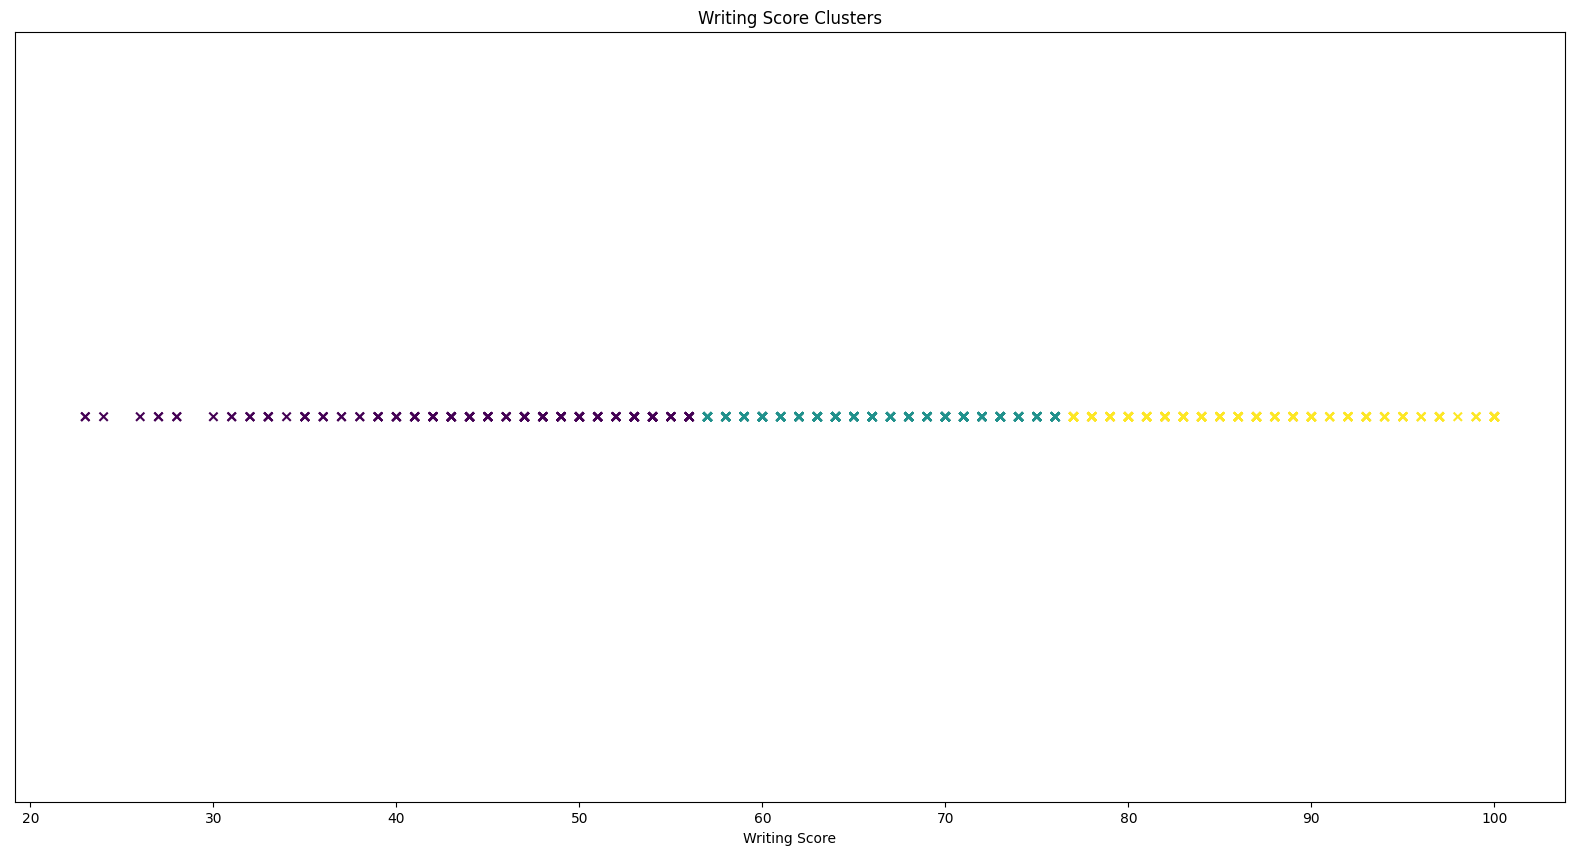

In [34]:
plt.scatter(df3['writing score'], [0] * len(df3), c=df3['writing_cluster'], cmap='viridis', marker='x')
plt.xlabel('Writing Score')
plt.title('Writing Score Clusters')
plt.yticks([])
plt.show()

In [35]:
df3

,test preparation course,math score,reading score,writing score,total marks,total percentage,math_cluster,reading_cluster,writing_cluster
0,completed,67,67,63,197,65.67,0,2,1
1,none,40,59,55,154,51.33,2,2,0
2,none,59,60,50,169,56.33,0,2,0
3,none,77,78,68,223,74.33,1,0,1
4,completed,78,73,68,219,73.00,1,2,1
...,...,...,...,...,...,...,...,...,...
995,none,73,70,65,208,69.33,0,2,1
996,completed,85,91,92,268,89.33,1,0,2
997,none,32,35,41,108,36.00,2,1,0
998,none,73,74,82,229,76.33,0,2,2


### function to check for clustering

In [38]:
def recommend_math_skills(user_cluster):
    if(user_cluster == 2):
        return "https://www.youtube.com/watch?v=8ywE0PMgwOM&list=PLQYgCxDYkIsx0vmogQCmXf57orVpwKNPL"
    elif user_cluster == 0:
        return "https://www.youtube.com/watch?v=SBCw4_XgouA&pp=ygUTd2UgZGlkIGl0IGRvcmEgc29uZw%3D%3D"
    else:
        return "https://www.youtube.com/watch?v=Y5bInzQiyuo&list=PLco74IzIY3JLJt_tm9F2epktWIq9u2ucu"
    
def recommend_read_skills(user_cluster):
    if(user_cluster == 0):
        return "https://www.youtube.com/watch?v=IOeaBha6dUU&list=PL7LFrjIsjhMlgrwrdTaeifxmuXwX7Ofv8"
    elif user_cluster == 2:
        return "https://www.youtube.com/watch?v=SBCw4_XgouA&pp=ygUTd2UgZGlkIGl0IGRvcmEgc29uZw%3D%3D"
    else:
        return "https://www.youtube.com/watch?v=zz4RcpAfHyU&list=PLp5zSGEKWyU4JMjeuuW-oXMfMcTGlRIvY"
    
def recommend_write_skills(user_cluster):
    if(user_cluster == 0):
        return "https://www.youtube.com/watch?v=DPaU8kYS3mI&list=PLMfo9NXs6ZfGa3qqm6GS98sMsBqkQy5-a"
    elif user_cluster == 1:
        return "https://www.youtube.com/watch?v=SBCw4_XgouA&pp=ygUTd2UgZGlkIGl0IGRvcmEgc29uZw%3D%3D"
    else:
        return "https://www.youtube.com/watch?v=GgkRoYPLhts&list=PLk0TOXGeAF848nM3WaM3DKNjuZ9JQfWxh"
    


### Taking data from and recommending based on clusters

In [39]:
# Take user input for math score
user_math_score = float(input("Enter your math score: "))
user_reading_score = float(input('Enter your Reading score: '))
user_writing_score = float(input('Enter your Writing score: '))

# Predict the cluster for user's math score
user_math_cluster = kmeans_math.predict([[user_math_score]])[0]
user_reading_cluster = kmeans_reading.predict([[user_reading_score]])[0]
user_writing_cluster = kmeans_writing.predict([[user_writing_score]])[0]

# Displaying the cluster for user's math score
print(f"Recommendation for Math: {recommend_math_skills(user_math_cluster)}")
print(f"Recommendation for Reading: {recommend_read_skills(user_reading_cluster)}")
print(f"Recommendation for Writing: {recommend_write_skills(user_writing_cluster)}")

Recommendation for Math: https://www.youtube.com/watch?v=SBCw4_XgouA&pp=ygUTd2UgZGlkIGl0IGRvcmEgc29uZw%3D%3D
Recommendation for Reading: https://www.youtube.com/watch?v=SBCw4_XgouA&pp=ygUTd2UgZGlkIGl0IGRvcmEgc29uZw%3D%3D
Recommendation for Writing: https://www.youtube.com/watch?v=SBCw4_XgouA&pp=ygUTd2UgZGlkIGl0IGRvcmEgc29uZw%3D%3D


C:\Users\varun\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\varun\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\varun\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
